In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

In [39]:
# Downloading stock data using yfinance
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'


In [40]:

data = yf.download(stock, start, end)
data.reset_index(inplace=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [41]:
# Data preprocessing for Decision Tree
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler_tree = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler_tree.fit_transform(data_train)


In [43]:
X_tree, y_tree = [], []

In [44]:
for i in range(100, data_train_scale.shape[0]):
    X_tree.append(data_train_scale[i-100:i])
    y_tree.append(data_train_scale[i, 0])

In [45]:
X_tree, y_tree = np.array(X_tree), np.array(y_tree)

In [46]:
# Splitting the data into training and testing sets
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

In [47]:
# Reshape X_train_tree and X_test_tree to 2D
X_train_tree_2d = X_train_tree.reshape(X_train_tree.shape[0], -1)
X_test_tree_2d = X_test_tree.reshape(X_test_tree.shape[0], -1)


In [48]:
# Creating and training the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_tree_2d, y_train_tree)

DecisionTreeRegressor(random_state=42)

In [49]:
# Predicting on the test set
y_pred_tree = tree_model.predict(X_test_tree_2d)

In [50]:
# Scaling back the predictions and actual values
y_pred_tree = y_pred_tree * scaler_tree.scale_
y_test_tree = y_test_tree * scaler_tree.scale_

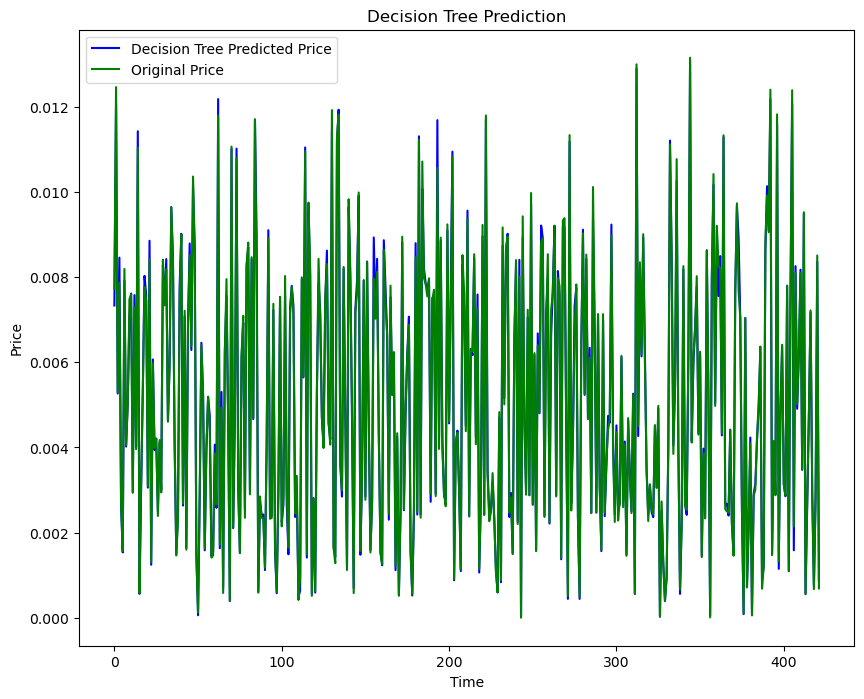

In [51]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(y_pred_tree, 'b', label='Decision Tree Predicted Price')
plt.plot(y_test_tree, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Decision Tree Prediction')
plt.show()

In [52]:
# Evaluating the model
mse_tree = mean_squared_error(y_test_tree, y_pred_tree)
r2_tree = r2_score(y_test_tree, y_pred_tree)
print(f'Mean Squared Error (Decision Tree): {mse_tree}')
print(f'R-squared (Decision Tree): {r2_tree}')

Mean Squared Error (Decision Tree): 4.209541760061005e-08
R-squared (Decision Tree): 0.9957534313553771
